# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [5]:
# Data Source: Used Car dataset on Kaggle
# Scope: Original dataset: 3M used cars; a subset of 426k cars is in scope for this analysis 

In [6]:
# Business Objectives:
# 1. Analyze the dataset to determine the top features and their corresponding weightage
# that contribute to a used car price
# 2. Use data pre-processing, data modeling, and model evaluation methodologies to make clear 
# recommendations to the used car dealership on what features consumers value most in a used car

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [8]:
# 1. Understand different features of the dataset, including the data types
# 2. Analyze sample dataset i.e. sample rows and columns to gauge the quality of dataset
# 3. Analyze the unique values for each feature and check # of null/missing values for each feature

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer

import random

In [10]:
data = pd.read_csv('data/vehicles.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [12]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [13]:
data.shape

(426880, 18)

In [14]:
# find columns with missing value

data.isnull().sum().sort_values()

id                   0
price                0
state                0
region               0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
VIN             161042
condition       174104
cylinders       177678
size            306361
dtype: int64

In [15]:
# Check different unique column values and how many occurances for each. Also, how many corresponding missing value occurances.

for column in data.columns:
    print(f"Value counts for column {column}:")
    print(data[column].value_counts())
    print(f"Missing values for column {column}: {data[column].isnull().sum()}")
    print("\n")

Value counts for column id:
id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: count, Length: 426880, dtype: int64
Missing values for column id: 0


Value counts for column region:
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
Missing values for column region: 0


Value counts for column price:
price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: int64
Missin

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [17]:
# Drop these columns: 
# VIN number shouldn't be a factor for determining price of a used car
# A significant # of values are missing for size column: 306,361
# A significant # of values are missing for drive column: 130,567
# id is not needed

data = data.drop(columns=['VIN','size','drive','id'])

In [18]:
# Update cylinder null values to other

data['cylinders'].fillna('other', inplace=True)

In [19]:
# find columns with missing value

data.isnull().sum().sort_values()

region               0
price                0
cylinders            0
state                0
year              1205
transmission      2556
fuel              3013
odometer          4400
model             5277
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
condition       174104
dtype: int64

In [20]:
# Find cylinder values for each manufacturer and model (excluding 'other')

common_cylinders = data[data['cylinders'] != 'other'].groupby(['manufacturer', 'model'])['cylinders'].agg(lambda x: x.value_counts().idxmax())

# Convert to a dictionary

cylinder_mapping = common_cylinders.to_dict()

In [21]:
# Define a function to map the most common cylinder value for rows where 'cylinders' == 'other'

def fill_cylinders(row):
    if row['cylinders'] == 'other':
        return cylinder_mapping.get((row['manufacturer'], row['model']), 'other')
    else:
        return row['cylinders']

# Apply the function to update the cylinders column
data['cylinders'] = data.apply(fill_cylinders, axis=1)

In [22]:
# Check how many other values remain

data['cylinders'].value_counts()

cylinders
6 cylinders     139814
4 cylinders     128988
8 cylinders     108342
other            44817
5 cylinders       2059
10 cylinders      1757
3 cylinders        880
12 cylinders       223
Name: count, dtype: int64

In [23]:
# Drop rows with 'other' cylinder column

drop_index = data[data['cylinders'] == 'other'].index

data = data.drop(drop_index)

In [24]:
# Remove the ' cylinders' part and convert to numeric

data['cylinders'] = data['cylinders'].str.replace(' cylinders', '').astype(int)

In [25]:
data['cylinders'].value_counts()

cylinders
6     139814
4     128988
8     108342
5       2059
10      1757
3        880
12       223
Name: count, dtype: int64

In [26]:
# Drop columns region (404 unique values), model (29,649 unique values), paint_color, state for modelling

data = data.drop(columns=['region','model', 'paint_color','state'])

In [27]:
# Remove rows with heavier vehicle types
# Type is Bus: 517 rows

drop_index = data[data['type'] == 'bus'].index

data = data.drop(drop_index)

In [28]:
# Update type (truck or pickup) as same type 'pickup truck'

data.loc[(data['type'] == 'pickup') | (data['type'] == 'truck'), 'type'] = 'pickup truck'

In [29]:
data['type'].value_counts()

type
sedan           77841
pickup truck    73602
SUV             72948
other           17350
coupe           16677
hatchback       12027
wagon            9073
van              8347
convertible      7102
mini-van         4740
offroad           598
Name: count, dtype: int64

In [30]:
# A significant # of values are missing from type column: 92,858. They can be updated to 'other'

data.loc[(data['type'].isnull()), 'type'] = 'other'

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381623 entries, 27 to 426878
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         381623 non-null  int64  
 1   year          380505 non-null  float64
 2   manufacturer  372467 non-null  object 
 3   condition     225780 non-null  object 
 4   cylinders     381623 non-null  int64  
 5   fuel          379350 non-null  object 
 6   odometer      377661 non-null  float64
 7   title_status  374135 non-null  object 
 8   transmission  379490 non-null  object 
 9   type          381623 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 32.0+ MB


In [32]:
# Missing values for column title_status: 8,242
# Update missing values to 'missing'

data['title_status'].fillna('missing', inplace = True)
data['title_status'].value_counts()

title_status
clean         361207
missing         8149
rebuilt         7025
salvage         3735
lien            1367
parts only       140
Name: count, dtype: int64

In [33]:
# Update title_status to numerical mapping (clean is 1, rest all are 0)

title_mapping = {'clean': 1, 'missing': 0, 'rebuilt': 0, 'salvage': 0, 'lien': 0, 'parts only':0}
data['title_status'] = data['title_status'].map(title_mapping)

In [34]:
data['title_status'].value_counts()

title_status
1    361207
0     20416
Name: count, dtype: int64

In [35]:
# Missing values for column transmission: 2,556
# Update missing values to 'other'

data['transmission'].fillna('other', inplace = True)
data['transmission'].value_counts()

transmission
automatic    314260
other         44717
manual        22646
Name: count, dtype: int64

In [36]:
# Missing values for column fuel: 3,013
# Update missing values to 'other'

data['fuel'].fillna('other', inplace = True)
data['fuel'].value_counts()

fuel
gas         327141
other        24963
diesel       24685
hybrid        4227
electric       607
Name: count, dtype: int64

In [37]:
# find columns with missing value
data.isnull().sum().sort_values()

price                0
cylinders            0
fuel                 0
title_status         0
transmission         0
type                 0
year              1118
odometer          3962
manufacturer      9156
condition       155843
dtype: int64

In [38]:
# Remove rows where all of the specified columns have NaN values
data = data.dropna(subset=['year', 'odometer', 'manufacturer', 'condition'], how='all')

# Check the cleaned data
data.isnull().sum().sort_values()

price                0
cylinders            0
fuel                 0
title_status         0
transmission         0
type                 0
year              1117
odometer          3961
manufacturer      9155
condition       155842
dtype: int64

In [39]:
# Missing values for column condition: 155,842

data['condition'].value_counts()

condition
excellent    98991
good         98014
like new     20583
fair          6459
new           1165
salvage        568
Name: count, dtype: int64

In [40]:
# Drop rows when condition is salvage (568 rows)

drop_index = data[data['condition'] == 'salvage'].index

data = data.drop(drop_index)

In [41]:
data['condition'].value_counts()

condition
excellent    98991
good         98014
like new     20583
fair          6459
new           1165
Name: count, dtype: int64

In [42]:
# Update condition to numerical mapping

condition_mapping = {'new': 4, 'like new': 3, 'excellent': 2, 'good': 1, 'fair': 0}
data['condition'] = data['condition'].map(condition_mapping)

In [43]:
data['condition'].value_counts()

condition
2.0    98991
1.0    98014
3.0    20583
0.0     6459
4.0     1165
Name: count, dtype: int64

In [44]:
# Check the cleaned data

data.isnull().sum().sort_values()

price                0
cylinders            0
fuel                 0
title_status         0
transmission         0
type                 0
year              1117
odometer          3961
manufacturer      9123
condition       155842
dtype: int64

In [45]:
# Drop rows where all critical columns are NaN

data = data.dropna(subset=['year', 'odometer', 'manufacturer', 'condition'])

# Check the cleaned data
data.isnull().sum().sort_values()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
dtype: int64

In [46]:
data.shape

(216356, 10)

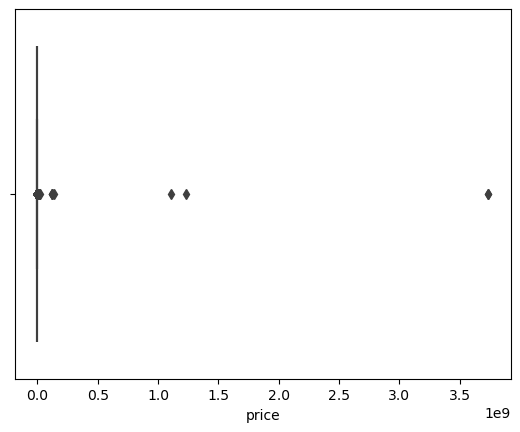

In [47]:
# Check for outliers in price

sns.boxplot(x=data['price'])
plt.show()

In [48]:
# Remove rows with prices < 1000

drop_index = data[data['price'] < 1000].index

data = data.drop(drop_index)

In [49]:
# Remove rows with prices > 75000

drop_index = data[data['price'] > 75000].index

data = data.drop(drop_index)

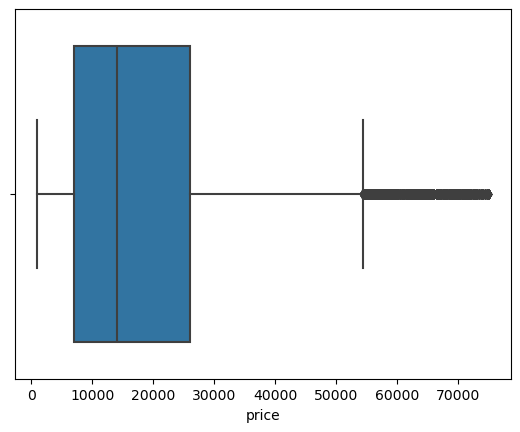

In [50]:
sns.boxplot(x=data['price'])
plt.show()

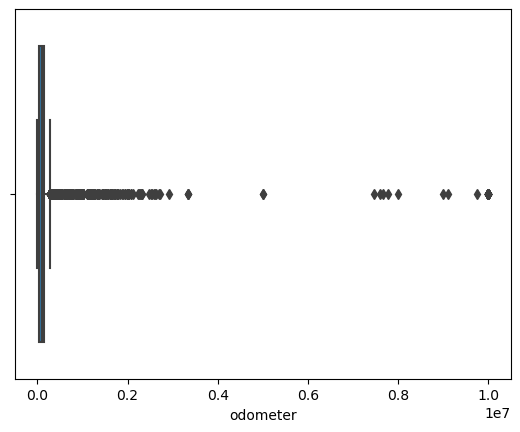

In [51]:
# Check for outliers in odometer

sns.boxplot(x=data['odometer'])
plt.show()

In [52]:
# Check for outliers in odometer

drop_index =  data[data['odometer'] > 500000].index

data = data.drop(drop_index)

In [53]:
# Remove rows with odometer = 0 as this number is fairly small

drop_index = data[data['odometer'] == 0].index

data = data.drop(drop_index)

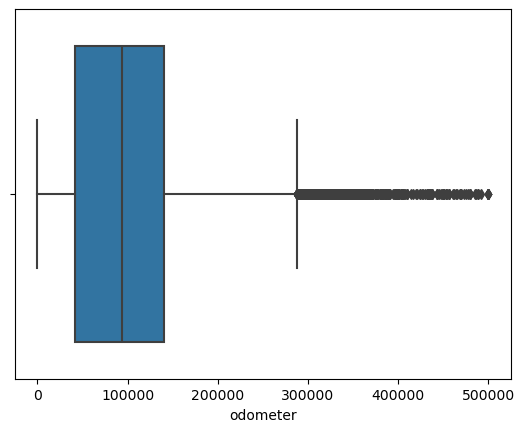

In [54]:
sns.boxplot(x=data['odometer'])
plt.show()

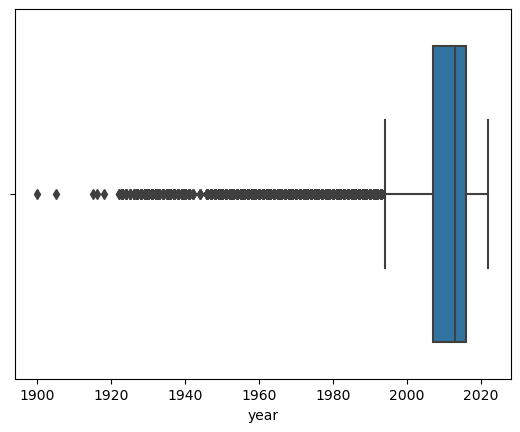

In [55]:
# Remove outliers in Year

sns.boxplot(x=data['year'])
plt.show()

In [56]:
# Remove rows with year older than 1980

drop_index = data[data['year'] < 1980].index

data = data.drop(drop_index)

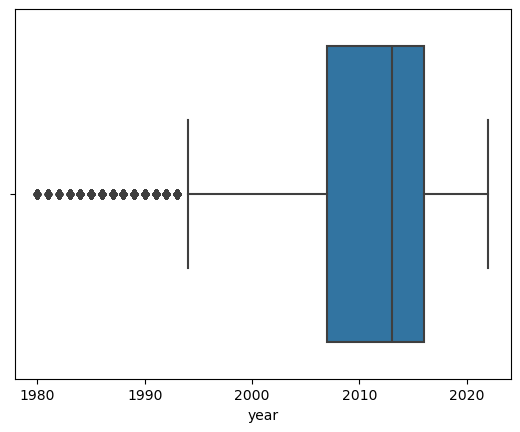

In [57]:
sns.boxplot(x=data['year'])
plt.show()

In [58]:
# Replace year with car_age

current_year = 2024
data['car_age'] = current_year - data['year']

In [59]:
# drop year column

data = data.drop(columns = ['year'])

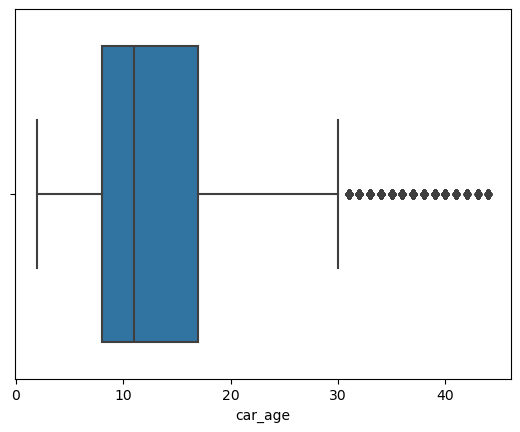

In [60]:
sns.boxplot(x=data['car_age'])
plt.show()

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197371 entries, 27 to 426878
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         197371 non-null  int64  
 1   manufacturer  197371 non-null  object 
 2   condition     197371 non-null  float64
 3   cylinders     197371 non-null  int64  
 4   fuel          197371 non-null  object 
 5   odometer      197371 non-null  float64
 6   title_status  197371 non-null  int64  
 7   transmission  197371 non-null  object 
 8   type          197371 non-null  object 
 9   car_age       197371 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 16.6+ MB


In [62]:
# Apply One-Hot Encoding for unordered categorical columns

#data = pd.get_dummies(data, columns=['manufacturer', 'fuel', 'transmission', 'type'])

In [63]:
# Identify categorical columns

categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['manufacturer', 'fuel', 'transmission', 'type'], dtype='object')

In [64]:
# Define the ColumnTransformer to apply OneHotEncoder to categorical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

data_transformed = preprocessor.fit_transform(data)

transformed_feature_names = preprocessor.get_feature_names_out()

# Check if the transformed data is sparse and convert it to a dense array if needed
if hasattr(data_transformed, 'toarray'):
    data_transformed = data_transformed.toarray()

data_transformed_df = pd.DataFrame(data_transformed, columns=transformed_feature_names)

data = data_transformed_df

data.head()

,cat__manufacturer_alfa-romeo,cat__manufacturer_aston-martin,cat__manufacturer_audi,cat__manufacturer_bmw,cat__manufacturer_buick,cat__manufacturer_cadillac,cat__manufacturer_chevrolet,cat__manufacturer_chrysler,cat__manufacturer_datsun,cat__manufacturer_dodge,...,cat__type_pickup truck,cat__type_sedan,cat__type_van,cat__type_wagon,remainder__price,remainder__condition,remainder__cylinders,remainder__odometer,remainder__title_status,remainder__car_age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,33590.0,1.0,8.0,57923.0,1.0,10.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,22590.0,1.0,8.0,71229.0,1.0,14.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,39590.0,1.0,8.0,19160.0,1.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,30990.0,1.0,8.0,41124.0,1.0,7.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,15000.0,2.0,6.0,128000.0,1.0,11.0


In [65]:
data.shape

(197371, 62)

In [66]:
# Drop duplicates

data = data.drop_duplicates()

In [67]:
data.shape

(120397, 62)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120397 entries, 0 to 197359
Data columns (total 62 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   cat__manufacturer_alfa-romeo       120397 non-null  float64
 1   cat__manufacturer_aston-martin     120397 non-null  float64
 2   cat__manufacturer_audi             120397 non-null  float64
 3   cat__manufacturer_bmw              120397 non-null  float64
 4   cat__manufacturer_buick            120397 non-null  float64
 5   cat__manufacturer_cadillac         120397 non-null  float64
 6   cat__manufacturer_chevrolet        120397 non-null  float64
 7   cat__manufacturer_chrysler         120397 non-null  float64
 8   cat__manufacturer_datsun           120397 non-null  float64
 9   cat__manufacturer_dodge            120397 non-null  float64
 10  cat__manufacturer_ferrari          120397 non-null  float64
 11  cat__manufacturer_fiat             120397 no

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


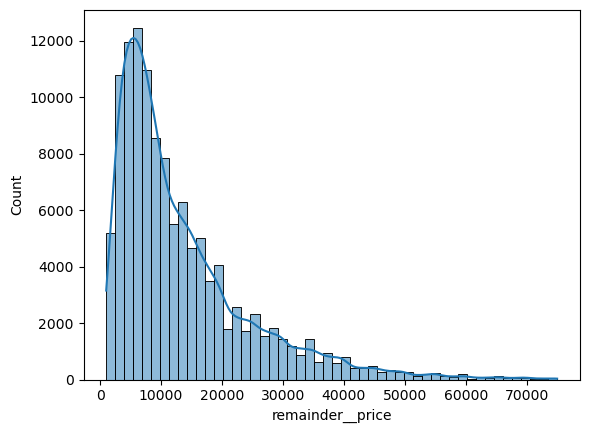

In [69]:
# Histogram plot for target price

sns.histplot(data['remainder__price'], bins=50, kde=True)
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [71]:
# Split into train and test dataset

X = data.drop('remainder__price', axis = 1)
#y = data['price']
# Trying out logarithmic transformation
y = np.log1p(data['remainder__price'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Skip this step
# Polynomial transformation on train and test datasets
# poly_transform = PolynomialFeatures(degree = 2, include_bias = False)
# X_train_poly = poly_transform.fit_transform(X_train)
# X_test_poly = poly_transform.fit_transform(X_test)
# columns = poly_transform.get_feature_names_out()

# train_df = pd.DataFrame(X_train_poly, columns = columns)
# test_df = pd.DataFrame(X_test_poly, columns = columns)

In [73]:
# Using the SequentialFeatureSelector function with a LinearRegression estimator to select six features

selector = SequentialFeatureSelector(LinearRegression(),n_features_to_select = 6)
best_features = selector.fit_transform(X_train, y_train)
best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())
best_features_df.head()

,cat__fuel_gas,cat__type_pickup truck,remainder__condition,remainder__cylinders,remainder__odometer,remainder__car_age
0,1.0,0.0,1.0,6.0,131000.0,16.0
1,1.0,1.0,2.0,8.0,124913.0,9.0
2,1.0,0.0,2.0,4.0,124709.0,18.0
3,1.0,0.0,2.0,8.0,48700.0,25.0
4,1.0,0.0,2.0,6.0,100082.0,15.0


In [74]:
# Pipeline for regression model

pipe = Pipeline([
    ("column_selector", selector),
    ("linreg", LinearRegression())
])
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)
train_mse = mean_squared_error(train_preds, y_train)
test_mse = mean_squared_error(test_preds, y_test)

print(f'Linear Regression with Sequential Feature Selector Train MSE: {train_mse: .2f}')
print(f'Linear Regression with Sequential Feature Selector Test MSE: {test_mse: .2f}')

Linear Regression with Sequential Feature Selector Train MSE:  0.25
Linear Regression with Sequential Feature Selector Test MSE:  0.25


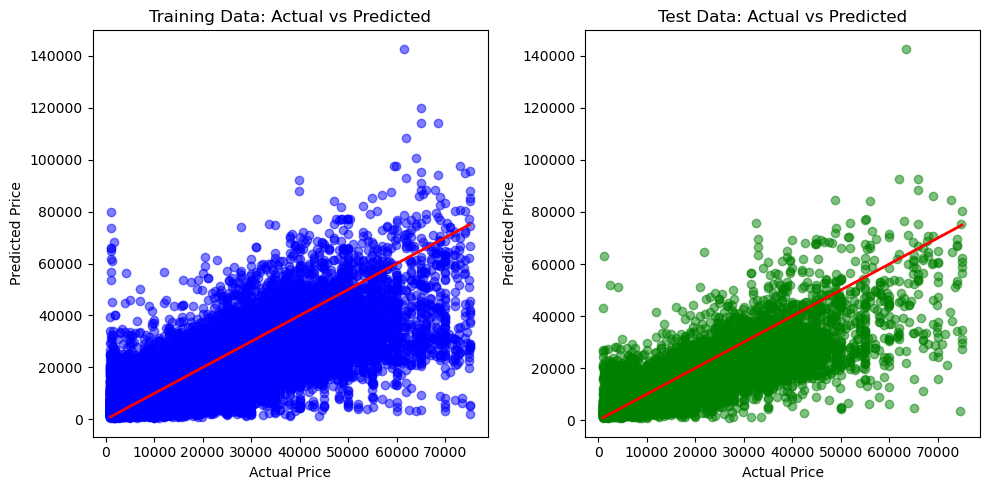

In [75]:
# Scatter plot for training data

y_train_actual = np.expm1(y_train)
train_preds_actual = np.expm1(train_preds)

y_test_actual = np.expm1(y_test)
test_preds_actual = np.expm1(test_preds)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, train_preds_actual, color='blue', alpha=0.5)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], color='red', lw=2)
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Scatter plot for test data

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, test_preds_actual, color='green', alpha=0.5)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red', lw=2)
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()

In [76]:
# Using Ridge Model with Polynomial Features

ridge_high_pipe = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2, include_bias = False)),
    ("ridge_high", Ridge(alpha = 1000))
])

ridge_high_pipe.fit(X_train, y_train)

train_preds = ridge_high_pipe.predict(X_train)
test_preds = ridge_high_pipe.predict(X_test)
train_mse = mean_squared_error(train_preds, y_train)
test_mse = mean_squared_error(test_preds, y_test)

print(f'Ridge Model with Polynomial Features Train MSE: {train_mse: .2f}')
print(f'Ridge Model with Polynomial Features Test MSE: {test_mse: .2f}')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.05738e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Model with Polynomial Features Train MSE:  0.15
Ridge Model with Polynomial Features Test MSE:  0.15


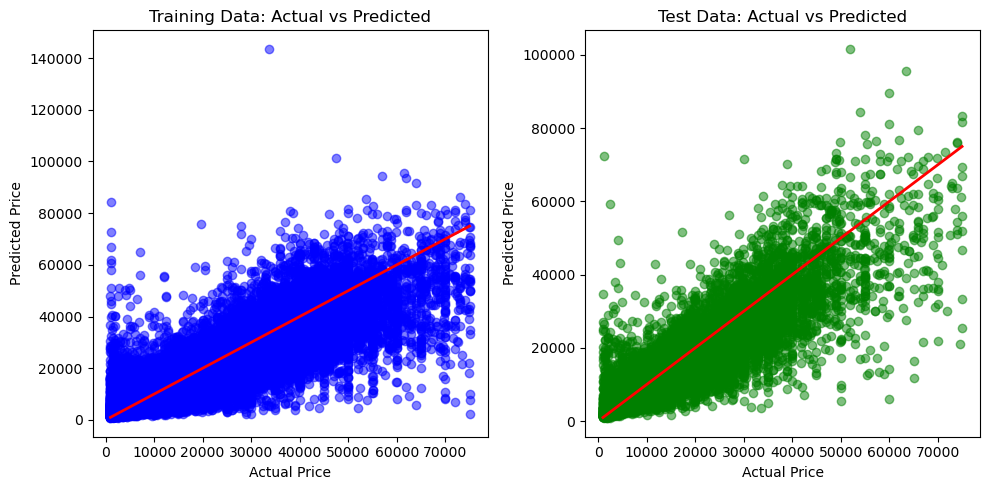

In [77]:
# Scatter plot for training data

y_train_actual = np.expm1(y_train)
train_preds_actual = np.expm1(train_preds)

y_test_actual = np.expm1(y_test)
test_preds_actual = np.expm1(test_preds)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, train_preds_actual, color='blue', alpha=0.5)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], color='red', lw=2)
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, test_preds_actual, color='green', alpha=0.5)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red', lw=2)
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()

In [78]:
poly_features = ridge_high_pipe.named_steps["poly_features"]
ridge_model = ridge_high_pipe.named_steps["ridge_high"]

feature_names = poly_features.get_feature_names_out(input_features=X_train.columns)

coefficients = ridge_model.coef_

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by="Abs_Coefficient", ascending=False)

print(feature_importance_df.head(10))

                                          Feature  Coefficient  \
60                             remainder__car_age    -0.162495   
56                           remainder__condition     0.131755   
6                     cat__manufacturer_chevrolet    -0.102165   
412                 cat__manufacturer_chevrolet^2    -0.102165   
768        cat__manufacturer_ford cat__type_sedan    -0.099180   
1937                       remainder__condition^2    -0.081488   
459   cat__manufacturer_chevrolet cat__type_sedan    -0.080852   
1752                cat__fuel_gas cat__type_other    -0.079072   
1668     cat__manufacturer_toyota cat__type_sedan    -0.078487   
1907                     cat__type_pickup truck^2     0.078012   

      Abs_Coefficient  
60           0.162495  
56           0.131755  
6            0.102165  
412          0.102165  
768          0.099180  
1937         0.081488  
459          0.080852  
1752         0.079072  
1668         0.078487  
1907         0.078012  


In [79]:
# Using GridSearch on Scaled Ridge Model

pipe = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2, include_bias = False)),
    ('scale', StandardScaler()),
    ('ridge', Ridge())])

param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}

grid = GridSearchCV(estimator = pipe,
                     param_grid = param_dict)

grid.fit(X_train, y_train)

train_preds = grid.predict(X_train)
test_preds = grid.predict(X_test)
train_mse = mean_squared_error(train_preds, y_train)
test_mse = mean_squared_error(test_preds, y_test)

print(f'GridSearch on Scaled Ridge Model Train MSE: {train_mse: .2f}')
print(f'GridSearch on Scaled Ridge Model Test MSE: {test_mse: .2f}')

best_alpha = grid.best_params_

print(f'GridSearch on Scaled Ridge Model Best Alpha: {list(best_alpha.values())[0]}')

GridSearch on Scaled Ridge Model Train MSE:  0.14
GridSearch on Scaled Ridge Model Test MSE:  0.14
GridSearch on Scaled Ridge Model Best Alpha: 10.0


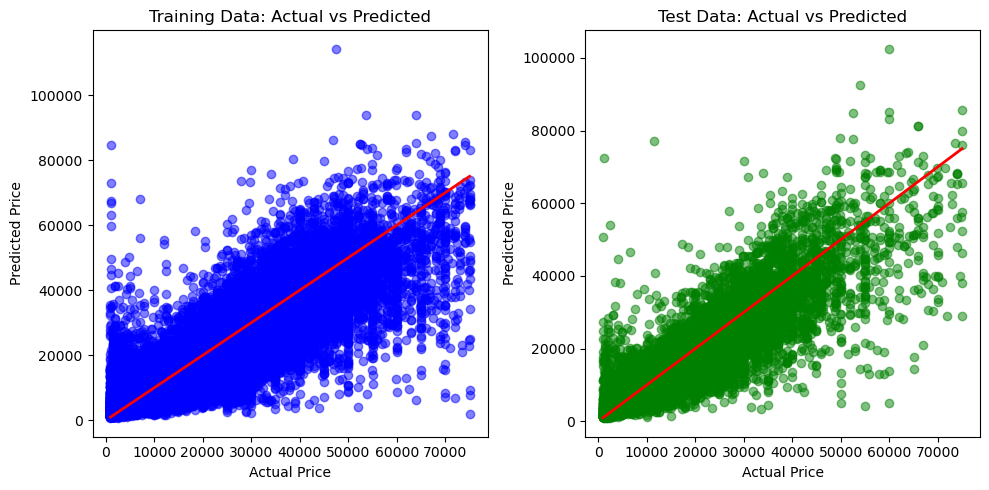

In [80]:
# Scatter plot for training data

y_train_actual = np.expm1(y_train)
train_preds_actual = np.expm1(train_preds)

y_test_actual = np.expm1(y_test)
test_preds_actual = np.expm1(test_preds)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, train_preds_actual, color='blue', alpha=0.5)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], color='red', lw=2)
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, test_preds_actual, color='green', alpha=0.5)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red', lw=2)
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()

In [81]:
best_pipe = grid.best_estimator_

poly = best_pipe.named_steps['poly_features']

feature_names = poly.get_feature_names_out(input_features=X_train.columns)

ridge_model = best_pipe.named_steps['ridge']

coefficients = ridge_model.coef_

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display sorted feature importance
print(feature_importance_sorted[['Feature', 'Coefficient']].head(25))


                                               Feature  Coefficient
60                                  remainder__car_age    -1.156811
1951                              remainder__car_age^2     0.657577
1937                            remainder__condition^2    -0.256698
463   cat__manufacturer_chevrolet remainder__cylinders     0.238733
56                                remainder__condition     0.231401
1912       cat__type_pickup truck remainder__cylinders    -0.214317
1941           remainder__condition remainder__car_age     0.165909
1942                            remainder__cylinders^2     0.150358
1758                cat__fuel_gas remainder__cylinders     0.144295
1748                     cat__fuel_gas cat__type_coupe     0.131667
756               cat__manufacturer_ford cat__fuel_gas    -0.119731
772        cat__manufacturer_ford remainder__cylinders     0.118032
1759                 cat__fuel_gas remainder__odometer    -0.117544
606              cat__manufacturer_dodge cat__fu

In [82]:
# Using GridSearch with LinearRegression, SequentialFeatureSelector

selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
selector_pipe

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('model', LinearRegression())])

In [83]:
param_dict = {'selector__n_features_to_select':[6, 7, 8]}

selector_grid = GridSearchCV(estimator = selector_pipe,
                            param_grid = param_dict)

selector_grid.fit(X_train, y_train)

train_preds = selector_grid.predict(X_train)

test_preds = selector_grid.predict(X_test)

train_mse = mean_squared_error(train_preds, y_train) 

test_mse = mean_squared_error(test_preds, y_test)

print(f'GridSearch with LinearRegression Train MSE: {train_mse: .2f}')
print(f'GridSearch with LinearRegression Test MSE: {test_mse: .2f}')

GridSearch with LinearRegression Train MSE:  0.24
GridSearch with LinearRegression Test MSE:  0.24


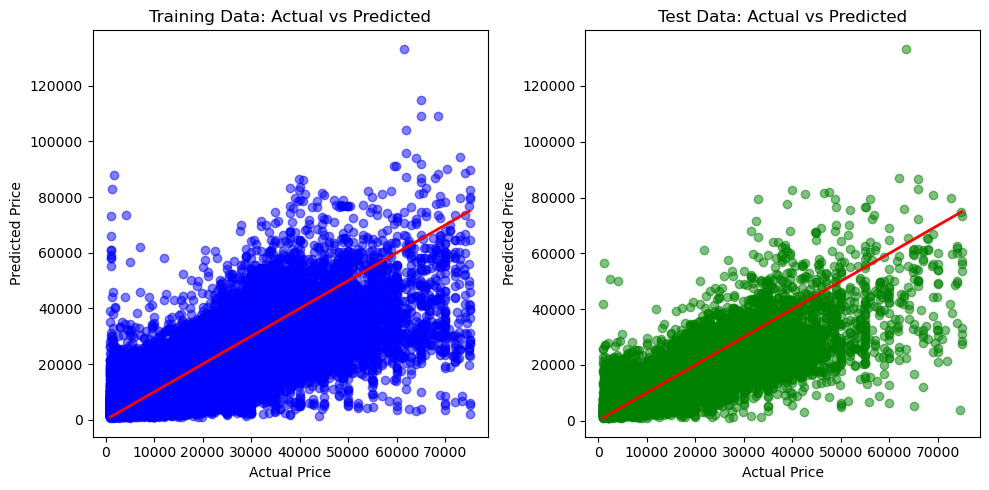

In [84]:
# Scatter plot for training data

y_train_actual = np.expm1(y_train)
train_preds_actual = np.expm1(train_preds)

y_test_actual = np.expm1(y_test)
test_preds_actual = np.expm1(test_preds)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, train_preds_actual, color='blue', alpha=0.5)
plt.plot([min(y_train_actual), max(y_train_actual)], [min(y_train_actual), max(y_train_actual)], color='red', lw=2)
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, test_preds_actual, color='green', alpha=0.5)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red', lw=2)
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.tight_layout()
plt.show()

In [85]:
best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = best_estimator.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=8)),
                ('model', LinearRegression())])
Features from best selector: Index(['cat__fuel_gas', 'cat__transmission_other', 'cat__type_pickup truck',
       'cat__type_sedan', 'remainder__condition', 'remainder__cylinders',
       'remainder__odometer', 'remainder__car_age'],
      dtype='object').
Coefficient values: 


,cat__fuel_gas,cat__transmission_other,cat__type_pickup truck,cat__type_sedan,remainder__condition,remainder__cylinders,remainder__odometer,remainder__car_age
model,-0.403507,0.287992,0.276272,-0.209288,0.174263,0.141197,-0.000005,-0.049944


In [86]:
# K-fold cross-validation on Scaled Ridge Model

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('ridge', Ridge())])

param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}

grid = GridSearchCV(estimator = pipe,
                    param_grid = param_dict,
                    scoring = "neg_mean_squared_error",
                    cv = 5)

grid.fit(X, y)

# Get the best parameters and cross-validation MSE
best_alpha = grid.best_params_
cv_mse = -grid.best_score_  # Since scoring is negative MSE, we negate it to get MSE

print(f'K-Fold CV MSE (5-fold): {cv_mse:.2f}')
print(f'Best Alpha from K-Fold CV: {list(best_alpha.values())[0]}')

K-Fold CV MSE (5-fold): 0.21
Best Alpha from K-Fold CV: 0.001


In [87]:
best_pipe = grid.best_estimator_

ridge_model = best_pipe.named_steps['ridge']

coefficients = ridge_model.coef_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display sorted feature importance
print(feature_importance_sorted[['Feature', 'Coefficient']].head(20))

                        Feature  Coefficient
60           remainder__car_age    -0.377772
58          remainder__odometer    -0.293425
57         remainder__cylinders     0.218766
41                cat__fuel_gas    -0.183723
56         remainder__condition     0.115466
53              cat__type_sedan    -0.097942
52       cat__type_pickup truck     0.088515
42             cat__fuel_hybrid    -0.078648
12       cat__manufacturer_ford    -0.075688
43              cat__fuel_other    -0.068349
45      cat__transmission_other     0.063026
29     cat__manufacturer_nissan    -0.059063
6   cat__manufacturer_chevrolet    -0.053945
44     cat__transmission_manual     0.052236
7    cat__manufacturer_chrysler    -0.051240
9       cat__manufacturer_dodge    -0.049519
16    cat__manufacturer_hyundai    -0.041835
26    cat__manufacturer_mercury    -0.039499
20        cat__manufacturer_kia    -0.038527
48          cat__type_hatchback    -0.036736


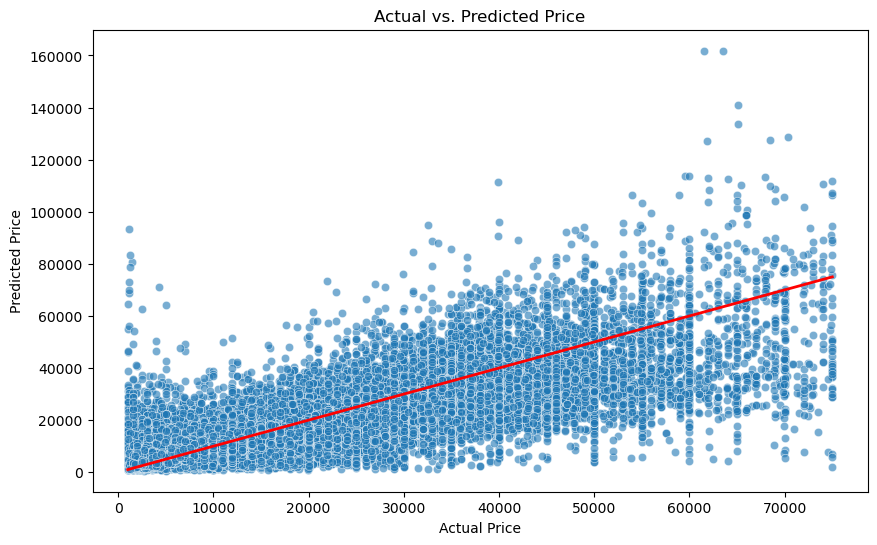

In [88]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X)

y_actual = np.expm1(y)       # Actual prices (reverse transformation on actual values)
y_pred_actual = np.expm1(y_pred)  # Predicted prices (reverse transformation on predicted values)

plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_actual, y=y_pred_actual, alpha=0.6)

plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red', lw=2)

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')

plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [90]:
# Built several models to determine the most impactful features and their weightage that contribute
# to the value of a used car. Here are the key findings:

In [91]:
# Model 1: Linear Regression with Sequential Feature Selector to select six features
# Test MSE: 0.25
# Top six features selected by model: 
# cat__fuel_gas	
# cat__type_pickup truck
# remainder__condition
# remainder__cylinders
# remainder__odometer	
# remainder__car_age

In [92]:
# Model 2: Ridge Model (alpha = 1000) with Polynomial Features (degree = 2)
# Test MSE: 0.15
# Top features selected by model with coefficients

#                                         Feature  Coefficient
#                              remainder__car_age    -0.162495   
#                            remainder__condition     0.131755   
#                     cat__manufacturer_chevrolet    -0.102165   
#                   cat__manufacturer_chevrolet^2    -0.102165   
#          cat__manufacturer_ford cat__type_sedan    -0.099180   
#                          remainder__condition^2    -0.081488   
#     cat__manufacturer_chevrolet cat__type_sedan    -0.080852   
#                   cat__fuel_gas cat__type_other    -0.079072   
#        cat__manufacturer_toyota cat__type_sedan    -0.078487   
#                        cat__type_pickup truck^2     0.078012  

In [93]:
# Model 3: GridSearch on Scaled Ridge Model with Polynomial Features (degree = 2)
# Ridge Model Best Alpha: 10.0
# Test MSE: 0.14
# Top features selected by model with coefficients
#                                              Feature  Coefficient
#                                   remainder__car_age    -1.156811
#                                 remainder__car_age^2     0.657577
#                               remainder__condition^2    -0.256698
#     cat__manufacturer_chevrolet remainder__cylinders     0.238733
#                                 remainder__condition     0.231401
#          cat__type_pickup truck remainder__cylinders    -0.214317
#              remainder__condition remainder__car_age     0.165909
#                               remainder__cylinders^2     0.150358
#                   cat__fuel_gas remainder__cylinders     0.144295
#                        cat__fuel_gas cat__type_coupe     0.131667
#                 cat__manufacturer_ford cat__fuel_gas    -0.119731
#          cat__manufacturer_ford remainder__cylinders     0.118032
#                    cat__fuel_gas remainder__odometer    -0.117544
#                cat__manufacturer_dodge cat__fuel_gas    -0.113428
#                cat__manufacturer_volvo cat__fuel_gas    -0.100866
#                                    cat__type_other^2    -0.097165
#                                      cat__type_other    -0.097165
#        cat__manufacturer_toyota remainder__cylinders     0.096308
#           cat__manufacturer_gmc remainder__cylinders     0.096127
#                                      cat__type_coupe    -0.092782
#                                    cat__type_coupe^2    -0.092782
#            cat__manufacturer_chevrolet cat__fuel_gas    -0.089377
#                        cat__fuel_gas cat__type_sedan     0.088985
#                        cat__manufacturer_chevrolet^2    -0.086227
#                          cat__manufacturer_chevrolet    -0.086227

In [94]:
# Model 4: GridSearch with LinearRegression, SequentialFeatureSelector
# Test MSE: 0.24
#                       Feature  Coefficient
#                 cat__fuel_gas	 -0.403507
#       cat__transmission_other   0.287992
#        cat__type_pickup truck   0.276272
#               cat__type_sedan  -0.209288
#          remainder__condition   0.174263
#          remainder__cylinders   0.141197
#           remainder__odometer  -0.000005
#            remainder__car_age  -0.049944

In [95]:
# Model 5: K-fold cross-validation on Scaled Ridge Model
# K-Fold CV MSE (5-fold): 0.21
# Best Alpha from K-Fold CV: 0.001

#                       Feature  Coefficient
#            remainder__car_age    -0.377772
#           remainder__odometer    -0.293425
#          remainder__cylinders     0.218766
#                 cat__fuel_gas    -0.183723
#          remainder__condition     0.115466
#               cat__type_sedan    -0.097942
#        cat__type_pickup truck     0.088515
#              cat__fuel_hybrid    -0.078648
#        cat__manufacturer_ford    -0.075688
#               cat__fuel_other    -0.068349
#       cat__transmission_other     0.063026
#      cat__manufacturer_nissan    -0.059063
#   cat__manufacturer_chevrolet    -0.053945
#      cat__transmission_manual     0.052236
#    cat__manufacturer_chrysler    -0.051240
#       cat__manufacturer_dodge    -0.049519
#     cat__manufacturer_hyundai    -0.041835
#     cat__manufacturer_mercury    -0.039499
#         cat__manufacturer_kia    -0.038527
#           cat__type_hatchback    -0.036736

In [ ]:
# Conclusion: Considering the Test MSE and the graphical visualization of predicted vs. actual priice of
# used cars on the test dataset, GridSearch on Scaled Ridge Model with 2nd degree Polynomial Features performed best.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
# Most influential factors valued by consumers for a better car price:
# a. Newer cars (i.e. less car age)
# b. Better car condition
# c. More # of cylinders
# d. Gas cars with more # of cylinders
# e. Sedan gas cars in general fetch higher price compared to coupe
# f. Car brands: Chevrolet/Ford with higher # of cylinders, Toyota/GMC with higher # of cylinders

In [ ]:
# Most influential factors contributing to lower car price: 
# a. Older cars
# b. Gas cars with higher mileage
# c. Car brands: Ford gas cars, Dodge gas cars, Volvo gas cars, Chevrolet gas cars with lower # of cylinders
# d. Pickup trucks with higher # of cylinders

In [ ]:
# Next steps & recommendations for better modeling
# 1. Revisit data preprocessing to include more # of features and more # of sample data by 
#    substituting more feature null values with appropriately derived values from the existing 
#    dataset
# 2. Do more data analysis/data substitution to remove inaccurate data
# 3. Remove more data outliers to avoid model skewing
# 4. Revisit more data transformation techniques in addition to HotEncoder during preprocessing
# 4. Incorporate more data visualization to better understand feature correlatation
# 5. Revisit modeling with more choices of hyperparameter values and higher degrees of polynomial
#    feature transformation